<a href= "http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml">
    <img src ="../data/NY_Taxi.png" height = "300px" width = "300px" align="right"/>
</a>
# <center> Exploratory Data Analysis on Green Taxis </center>


This notebook is an analysis on the data collected by the New York City Taxi and Limousine commission about <strong> "Green" </strong> Taxis. Green Taxis (as opposed to yellow ones) are taxis that are not allowed to pick up passengers inside of the densely populated areas of Manhattan

The analysis is on the September 2015 dataset. Link to download dataset can be found [here](https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2015-09.csv)

Let's start the analysis by importing the necessary python modules for assitance.

## Importing libraries for analysis

<strong>Note: </strong> Be sure to install these python libraries before importing from PyPI using pip. General command for downloading and installing 'requests' library (for e.g) would be:

```shell
$ pip install requests
```

In [22]:
import requests # required to download csv file from the URL
import pandas as pd # used for data analysis
from six.moves.urllib.request import urlretrieve # used for csv file download
import os # to check for already existing file on the disk
import matplotlib.pyplot as plt # used for plotting histograms and graph

## Global Variables

Defining some global variables to be used in the code. This technique of centralized decleration for all the variables provides the flexibility of code modulation in future

In [249]:
CSV_DATA_URL = "https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2015-09.csv"
DEST_FILENAME = "../data/green.csv"
X_LABEL_HIST = "Distance covered by Green Taxis(miles)"    
Y_LABEL_HIST = "Number of Trips"
TITLE_HIST   = "Histogram of Trip_distance by Green Taxis"
PICKUP_TIME_COLUMN = "lpep_pickup_datetime"
TRIP_DISTANCE_COLUMN = "Trip_distance"
MEAN_TRIP_DISTANCE_BY_HOUR  = "meanTripDistByHour"
MEDIAN_TRIP_DISTANCE_BY_HOUR = "medianTripDistByHour"
TITLE_MEAN_MEDIAN= "Mean v/s Median Trip_distance grouped by hour"
XLabel_MEAN_MEDIAN = "HOURS"
YLabel_MEAN_MEDIAN = "Trip Distance (miles)"
RateCodeID = "RateCodeID"

## Downloading the data

Downloading the csv file related to green taxis information from amazon S3. Be sure to check for working internet connection before running the below cell.

In [168]:
def downloadData(CSV_DATA_URL, DEST_FILENAME):
    """
    Function to download the file from the internet and save on to the disk
    
    :param CSV_DATA_URL  : URL of CSV file we want to download
    :param dest_filename : Destination path to save the downloaded file on to disk
    :return              : None
    """
    if not os.path.exists(DEST_FILENAME):
        print ("Downloading file. . .")
        filename, _ = urlretrieve(CSV_DATA_URL, DEST_FILENAME)
        print ("Download Complete. File at {0}".format(DEST_FILENAME))
    else: 
        print ("File already present at {0}".format(DEST_FILENAME))

# calling the downloadData function
downloadData(CSV_DATA_URL, DEST_FILENAME)

# Reading csv file into pandas dataFrame
df = pd.read_csv(DEST_FILENAME)
print ("\nSample of the data : ")
df.head()

File already present at ../data/green.csv

Sample of the data : 


,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,...,7.8,0.0,0.0,1.95,0.0,NaN,0.0,9.75,1,2.0
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,...,45.0,0.0,0.0,0.00,0.0,NaN,0.0,45.00,1,2.0
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,...,4.0,0.5,0.5,0.50,0.0,NaN,0.3,5.80,1,1.0
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0


After having loaded the csv file on to memory as pandas dataframe, let us proceed to further analysis of the dataset

## 1) No. of rows and columns in the dataset

In [20]:
print ("Dataset contains : {0} number of rows and {1} number of columns".format(len(df), len(df.columns)))

Dataset contains : 1494926 number of rows and 21 number of columns


## 2) Analysis of Trip_distance by green taxis

Let us start with exploration of the summary of 'Trip_distance' column, i.e. the trips mean distance, max distance, and quartiles. This will give us the idea about the distibution pattern the data is following

In [176]:
# get the mean, standard_deviation, max and quartiles about the Trip_distance made by green taxis
print ("Trip_distance metrics : ")
df[TRIP_DISTANCE_COLUMN].describe()

Trip_distance metrics : 


count    1.494926e+06
mean     2.968141e+00
std      3.076621e+00
min      0.000000e+00
25%      1.100000e+00
50%      1.980000e+00
75%      3.740000e+00
max      6.031000e+02
Name: Trip_distance, dtype: float64

The above statistical exploration suggests that out of $1,494,926$ trips made by the green taxis, majority made short trips: average distance per trip, $\mu $ being $ = 2.97 $ miles. However we also have a taxi that made a trip for $603$ miles (Wao! thats a lot. May be it was going out of state, or may be reading meter was damaged. This needs further analysis). This outlier point might distort our histogram we propose to build.

The standard deviation value, $ \sigma = 3.07$ miles suggests that, the data might be skewed (or it may also be because of the outlier point in our data. Needs data cleaning and further analysis)

Let us plot the <strong> histogram of Trip_distance</strong> to get the better idea. We will use the logScale for plotting because of disparate Trip_distance by green taxis

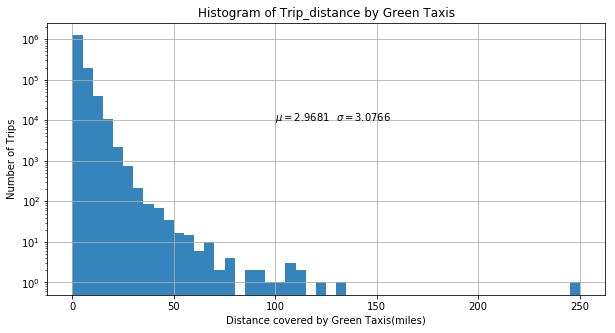

In [179]:
%matplotlib inline
def plotHist(trip_distance, xlabel, ylabel, title, showMu=True):
    """
    Function to plot histogram of Trip_distance by green taxis
    
    :param trip_distance : A pandas series of float values
    :param xlabel        : String. xlabel for the plot
    :param ylabel        : String. ylabel for the plot
    :param title         : String. This variable sets the title of the plot
    :param showMu        : Boolean. This tells the function whether to show mean value on the plot or not.
    :return              : None
    """    
    mean = "%.4f"%trip_distance.mean()
    std_dev = "%.4f"%trip_distance.std()
    plt.figure(figsize=(10,5))
    plt.yscale("log")
    plt.xlabel("{0}".format(xlabel))
    plt.ylabel("{0}".format(ylabel))
    plt.title("{0}".format(title))
    plt.hist(trip_distance, 50, alpha = 0.9,range=(0,250))
    if showMu:
        plt.text(100, 10**4, r'$\mu = {0}$'.format(mean))
        plt.text(130, 10**4, r'$\sigma = {0}$'.format(std_dev))
    plt.grid(True)
    plt.show()
    
plotHist(df[TRIP_DISTANCE_COLUMN], X_LABEL_HIST, Y_LABEL_HIST, TITLE_HIST)

Our assumption was correct. The data is skewed. Its skewed towards right. This suggests that <strong>commuters tends to hire taxis for wide range of distances</strong>. There are exceptions when taxis make trip for distance > 200 miles. 

The varied range of distance trip by the green taxi in new york might be because:

* Short Distances (0-10 miles)  : Commuters are commuting to their offices or the nearest metro station or friends/relative's home or even to various landmarks (New York being cultural capital of the world)
* Long Distances (10-100 miles) : Commuters are commuting to get away places in New Jersey or hiking places near to  NYC. The relative less no. of long distance trips compared to short ones may also be attributed to the fact the people prefer metros/buses/private transport for commuting than taxis.

The histogram of Trip_distance does give us a brief idea of how commuters are using Green Taxis for commute. We also made some interesting hypothesis. To dig deeper and find out how much of it is true, let us analyze Trip_distance grouped by hour of the day and how many of the trips end up at Airport

## 3) Trip_distance by the hour of the day

In [174]:
def getTripDistByHour(df, timeColumn, targetColumn):
    """
    Function computes and return the mean and median of Trip_distance grouped by the hour
    
    :param df          : pandas dataframe
    :param timeColumn  : String. Column name of dataframe which contains date-time value. May be string type or
                         Datetime time
    :param targetColumn: String. Trip_distance column name in dataFrame
    :return            : panda Series of mean and median of targetColumn grouped by hour of timeColumn
    """
    timeStampColumn = pd.DatetimeIndex(df[timeColumn])
    meanGrp = df.groupby([timeStampColumn.hour])[targetColumn].mean()
    medianGrp = df.groupby([timeStampColumn.hour])[targetColumn].median()
    
    return meanGrp, medianGrp

meanGrp, medianGrp = getTripDistByHour(df, PICKUP_TIME_COLUMN, TRIP_DISTANCE_COLUMN)

The function returned us the mean and median Trip_distances by the green taxi grouped by the day. 

Let us have a look at them side by side for better comparision

In [235]:
def getCombinedMeanMedianTripDist(meanGrp, medianGrp):
    """
    Function displays the value of meanGrp and medianGrp onto screen side by side
    :param meanGrp  : panda Series. Series of mean Trip_distance grouped by hour
    :param medianGrp: panda Series. Series of median Trip_distance grouped by hour
    :return         : panda dataframe : A dataframe with meanGrp and medianGrp as its column
    """    
    dfMeanMedian = pd.DataFrame()
    dfMeanMedian[MEAN_TRIP_DISTANCE_BY_HOUR] = meanGrp
    dfMeanMedian[MEDIAN_TRIP_DISTANCE_BY_HOUR] = medianGrp
    dfMeanMedian.reset_index(inplace=True)
    dfMeanMedian.drop(PICKUP_TIME_COLUMN, axis = 1, inplace=True)
    return dfMeanMedian
    
dfCombinedMeanMedian = getCombinedMeanMedianTripDist(meanGrp, medianGrp)
dfCombinedMeanMedian

,meanTripDistByHour,medianTripDistByHour
0,3.115276,2.20
1,3.017347,2.12
2,3.046176,2.14
3,3.212945,2.20
4,3.526555,2.36
5,4.133474,2.90
6,4.055149,2.84
7,3.284394,2.17
8,3.048450,1.98
9,2.999105,1.96


The above dataframe shows there seems to be a spike in average and median Trip_distance during 5-6 am. For a better look, lets plot the mean and median values below : 

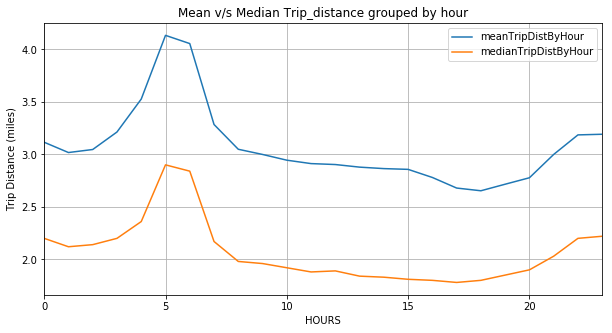

In [255]:
#plotting dataFrame
def plotMeanMedianDF(dfCombinedMeanMedian, title, xlabel, ylabel):
    """
    Function plots df
    :param dfCombinedMeanMedian : pandas dataFrame
    :param title : String. Title for the plot
    :param xlabel: String. xlabel for the plot
    :param ylabel: String. ylabel for the plot
    :return      : None
    """
    plot = dfCombinedMeanMedian.plot(figsize=(10,5), title=title,grid=True)
    plot.set_xlabel(xlabel)
    plot.set_ylabel(ylabel)
    plt.show()
    
plotMeanMedianDF(dfCombinedMeanMedian, MEAN_MEDIAN_OF_TITLE, MEAN_MEDIAN_OF_XLabel, MEAN_MEDIAN_OF_YLabel)

The median tends to follow the mean Trip_distance and there is for sure a spike in distance travelled by green taxis duing morning. One of the reasons can be people travelling to the offices to start their day or people travelling from airport to their home and offices.

To check our hypothesis related to Trip_distance from Airports during 5-6 am, lets analyze the data for the trip made from JFK (one of the world bussiest airport)

The 'RateCodeID' of '2' in out dataFrame will help provide us the information for trips related to JFK. Let us have a look.

## 3b) Rides To-From JFK Airport

Plot of Trip_distance for rides related to JFK


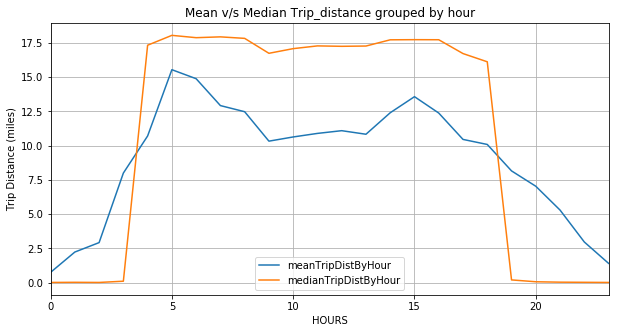

In [256]:
# Extracting information for rides related to JFK
dfAirport = df[df[RateCodeID]==2]
meanGrpFiltered, medianGrpFiltered = getTripDistByHour(dfAirport, PICKUP_TIME_COLUMN, TRIP_DISTANCE_COLUMN)
dfCombinedMeanMedianFiltered = getCombinedMeanMedianTripDist(meanGrpFiltered, medianGrpFiltered)
print("Plot of Trip_distance for rides related to JFK")
plotMeanMedianDF(dfCombinedMeanMedianFiltered, TITLE_MEAN_MEDIAN, XLabel_MEAN_MEDIAN, YLabel_MEAN_MEDIAN)

Aha ! The above plot depicting Trip_distance related to JFK shows increases in rides from 4am - 6pm with the highest being at 5 am in the morning. This might approve of our hypothesis that, it is because of the folks travelling to-from JFK in the morning (5 am - 6am) that total Trip_distance by green taxis surges.

* Interesting Point : Trip_distance related to JFK around 12:00 am in the morning are very low. It might suggest that the density of flight landing and taking off from JFK is low during this period. This may also be incorrect because we are only looking at data for Sept 2015 which might cause a bias in the result. A deeper analysis is needed. Inspite of this, its an interesting point to note.

Let us also look at the NUMBER of these trips related to JFK. Is this number that great to affect the overall increase in Trip_distance during 5 am - 6 am ?

In [254]:
print("No. of rides originating or terminating at JFK : {0}".format(len(dfAirport)))

No. of rides originating or terminating at JFK : 4435


<strong> 4435 </strong> number of rides related to JFK does not seem to be that great to affect the total increase in Trip_distance. That means, there are other factors that is making the Trip_distance increase during 5 am - 6 am.

Let us also take a look at the average fair generated from the trips related to JFK and compare them with trips not related to JFK

In [284]:
# Slicing df DataFrame for values where df[RateCodeId] != 2
dfNonAirport = df.loc[df[RateCodeID]!=2]
dfAirport['Fare_amount'].sum()

217412.0

In [285]:
dfNonAirport['Fare_amount'].sum()

18533740.089999992

In [286]:
dfAirport['Fare_amount'].sum()/dfNonAirport['Fare_amount'].sum()

0.011730605854201341